A partir de los datos de iris:

Ejercicio 1:

- Carga los datos originales
- Utiliza PCA para reducir la dimensionalidad de los datos. No reemplaces X con el resultado, crea una nueva X_pca. Utiliza PCA(2) y otra con PCA(3)
- Utiliza Kmeans para agrupar y predecir las clases de los nuevos datos.
- Compara los resultados para PCA(2) y PCA(3) con las clases originales (y_real).
- ¿Es mejor PCA(2) o PCA(3)?

Ejercicio 2: 

- Repite el proceso con T-SNE y DBSCAN. ¿Cuál da mejores resultados?


In [255]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.manifold import TSNE

In [39]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [123]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
pca = PCA(n_components=2)

In [20]:
pca3 = PCA(n_components=3)

In [7]:
pca.fit(X)

PCA(n_components=2)

In [21]:
pca3.fit(X)

PCA(n_components=3)

In [40]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [41]:
pca3.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [11]:
X_pca = pca.transform(iris.data)

In [23]:
X_pca3 = pca3.transform(iris.data)

In [14]:
X_pca = pca.fit_transform(iris.data)

In [35]:
X_pca3 = pca3.fit_transform(iris.data)

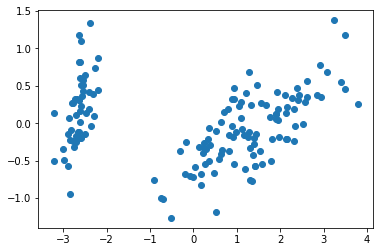

In [29]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])

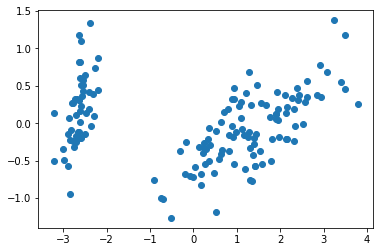

In [36]:
plt.scatter(X_pca3[:, 0], X_pca3[:, 1])

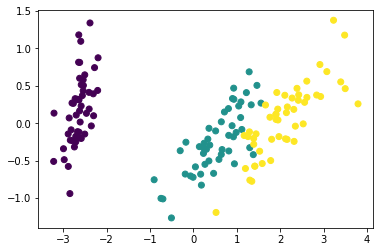

In [30]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)

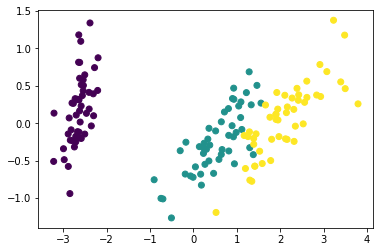

In [37]:
plt.scatter(X_pca3[:, 0], X_pca3[:, 1], c=iris.target)

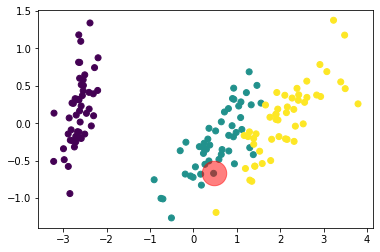

In [147]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.scatter([X_pca[90][0]], [X_pca[90][1]], s=600, c=["r"], alpha=0.5)

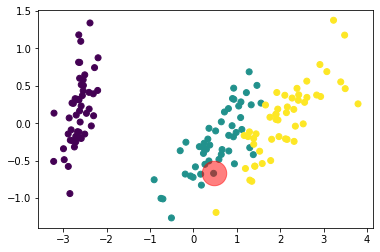

In [38]:
plt.scatter(X_pca3[:, 0], X_pca3[:, 1], c=iris.target)
plt.scatter([X_pca3[90][0]], [X_pca3[90][1]], s=600, c=["r"], alpha=0.5)

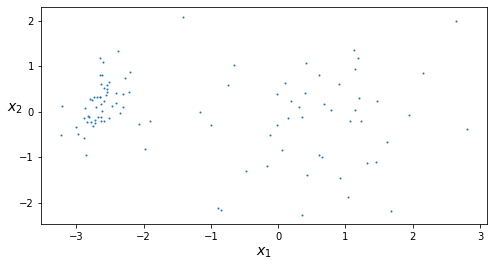

In [148]:
blob_centers = X_pca
blob_std = iris.target
X, y = make_blobs(centers=blob_centers,
                  cluster_std=blob_std, random_state=7)
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

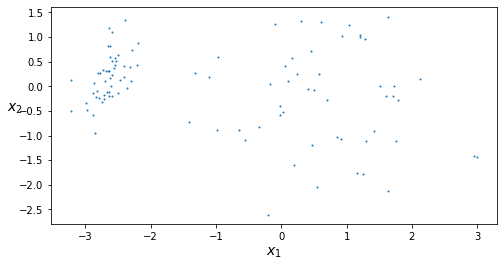

In [149]:
blob_centers3 = X_pca3
blob_std = iris.target
X3, y3 = make_blobs(centers=blob_centers3,
                  cluster_std=blob_std, random_state=7)
plt.figure(figsize=(8, 4))
plot_clusters(X3)
plt.show()

In [100]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

In [131]:
centroids = kmeans.cluster_centers_
labels= kmeans.labels_

In [155]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred3 = kmeans.fit_predict(X_pca)

In [156]:
k = 3
kmeans3 = KMeans(n_clusters=k, random_state=42)
y_pred3 = kmeans3.fit_predict(X_pca3)

In [210]:
kmeans.cluster_centers_

array([[ 2.34652659,  0.27393856],
       [-2.64241546,  0.19088505],
       [ 0.66567601, -0.3316042 ]])

In [158]:
kmeans3.cluster_centers_

array([[ 0.67566229, -0.31520477, -0.04217302],
       [-2.64241546,  0.19088505,  0.01358128],
       [ 2.37446608,  0.26311694,  0.05093851]])

In [206]:
kcen

array([[ 2.34652659,  0.27393856],
       [-2.64241546,  0.19088505],
       [ 0.66567601, -0.3316042 ]])

In [91]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

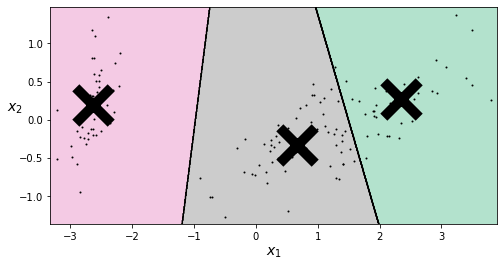

In [159]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_pca)
plt.show()

In [183]:
confusion_matrix(blob_std, y_pred)

array([[ 0, 50,  0],
       [ 3,  0, 47],
       [36,  0, 14]], dtype=int64)

In [184]:
confusion_matrix(blob_std, y_pred3)

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]], dtype=int64)

In [185]:
balanced_accuracy_score(blob_std, y_pred)

0.09333333333333334

In [186]:
balanced_accuracy_score(blob_std, y_pred3)


0.24

In [187]:
print(classification_report(blob_std, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.23      0.28      0.25        50

    accuracy                           0.09       150
   macro avg       0.08      0.09      0.08       150
weighted avg       0.08      0.09      0.08       150



In [188]:
print(classification_report(blob_std, y_pred3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.24       150
   macro avg       0.32      0.24      0.27       150
weighted avg       0.32      0.24      0.27       150



## DBSCAN

In [241]:
centers = kmeans.cluster_centers_
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

In [253]:
db = DBSCAN(eps=0.22, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 67
Homogeneity: 0.532
Completeness: 0.662
V-measure: 0.590
Adjusted Rand Index: 0.504
Adjusted Mutual Information: 0.589
Silhouette Coefficient: 0.422


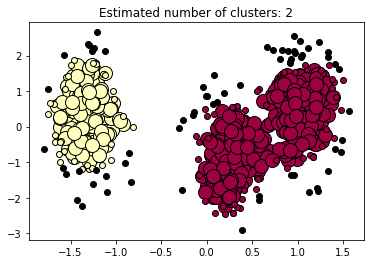

In [254]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## TSNE

In [269]:
df = pd.DataFrame(data=iris.data)

In [274]:
X_embedded = TSNE(n_components=2).fit_transform(df.values)


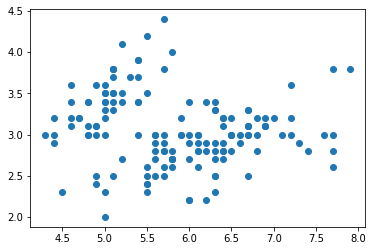

In [275]:
plt.scatter(df[0], df[1])

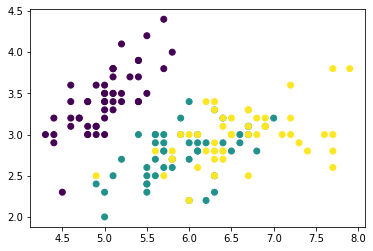

In [276]:
plt.scatter(df[0], df[1], c=iris.target)